In [96]:
library(ggplot2)

In [97]:
# read in data
bb = read.table('babies.txt', header=1)
bb$smoke[bb$smoke == 0] <- "Non-smoker"
bb$smoke[bb$smoke == 1] <- "Smoker"
bb <- bb[bb$smoke!=9,]

In [ ]:
# remove extreme outliers
bb <- bb[bb$smoke!=9,]
bb <- bb[bb$weight<750,]
bb <- bb[bb$height<75,]
bb <- bb[bb$age<50,]
bb <- bb[bb$gestation<500,]

In [ ]:
# boxplot data
bb = rbind(ns, s)
p = ggplot(bb, aes(x=smoke, y=bwt, group=smoke)) + geom_boxplot()
p + labs(title="Baby Weights in Smoking vs Non-smoking Mothers", 
         x="Mother's Smoking Status", 
         y="Baby Weight (oz)")

In [ ]:
# print mean and sd for smokers and non-smokers
cat("non-smoker\n")
cat("mean", mean(ns$bwt), '\n')
cat("sd", sd(ns$bwt), '\n')
cat("smoker\n")
cat("mean", mean(s$bwt), '\n')
cat("sd", sd(s$bwt))

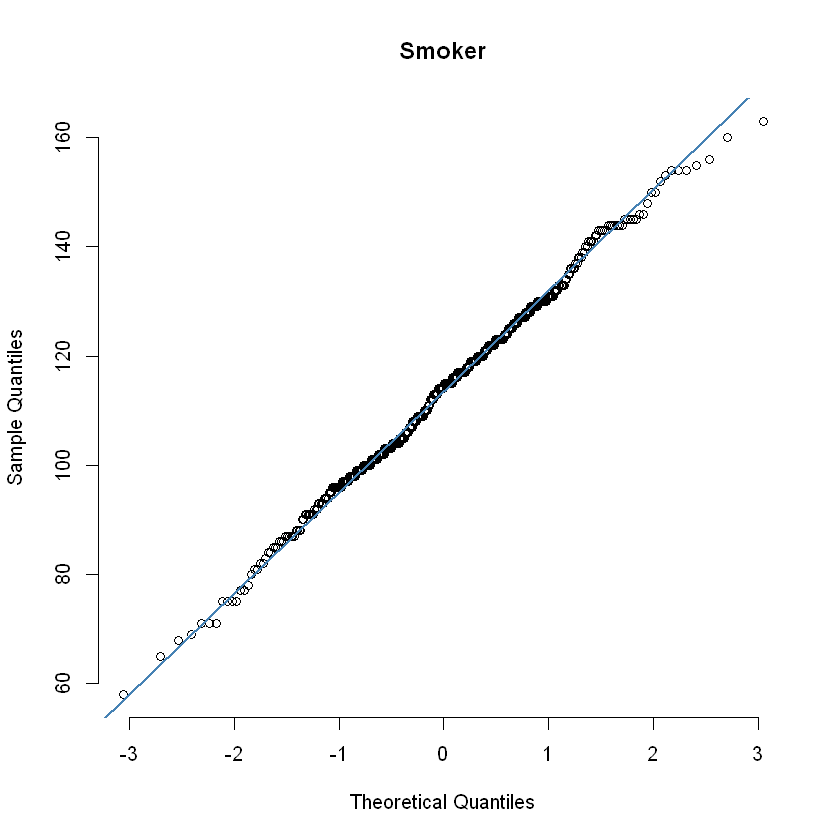

In [105]:
# Q-Q Plot
qqnorm(s$bwt, pch = 1, frame=FALSE, main="Smoker")
qqline(s$bwt, col="steelblue", lwd=2)

In [101]:
# split data into non-smokers and smokers
ns<-bb[bb$smoke=="Non-smoker",]
s<-bb[bb$smoke=="Smoker",]

In [102]:
# filter smokers and non-smokers by 'box whisker' method
Q1 = summary(ns$bwt)['1st Qu.']
Q3 = summary(ns$bwt)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
ns<-ns[ns$bwt > min_cutoff, ]
ns<-ns[ns$bwt < max_cutoff, ]

Q1 = summary(s$bwt)['1st Qu.']
Q3 = summary(s$bwt)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
s<-s[s$weight > min_cutoff, ]
s<-s[s$weight < max_cutoff, ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


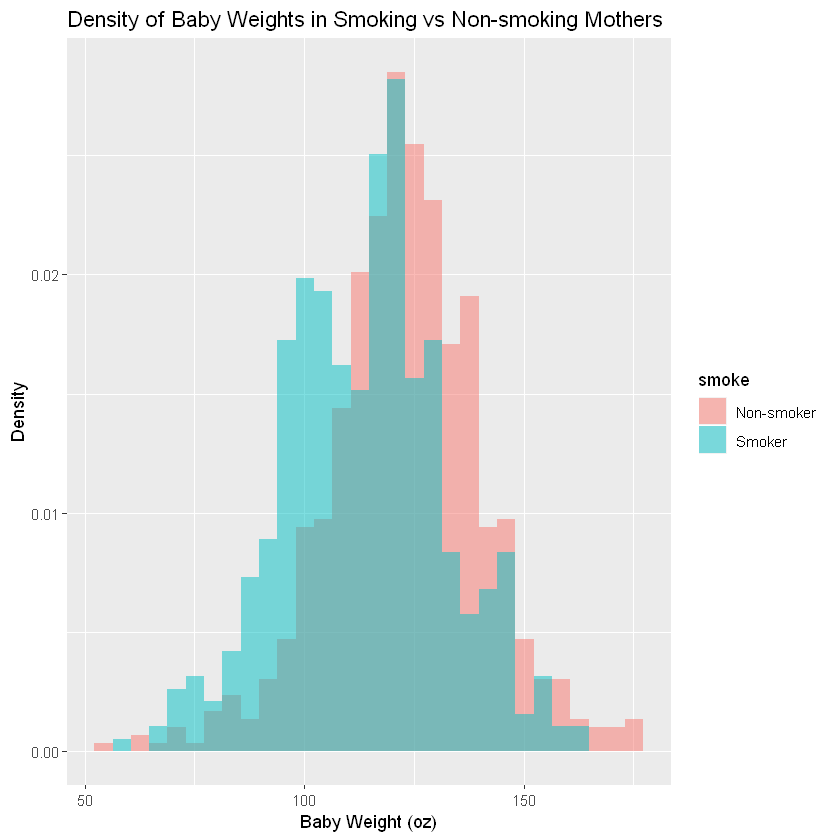

In [104]:
# create histogram
p = ggplot(bb, aes(bwt, fill=smoke)) + geom_histogram(alpha=.5, aes(y=..density..), position='identity')
p + labs(title="Density of Baby Weights in Smoking vs Non-smoking Mothers", 
         x="Baby Weight (oz)", 
         y="Density")

In [93]:
# generate gestational periods table
means <- list()
sds <- list()
for (i in 32:46) {
    week_lower = i
    week_upper = i + 1
    day_lower = week_lower * 7
    day_upper = week_upper * 7
    t <- ns[ns$gestation < day_upper, ]
    mean <- sum(t$bwt) / nrow(t)
    means[i] <- mean
    sd <- sd(t$bwt)
    sds[i] <- sd
    cat("week", i, ":", mean, "sd:", sd, "\n")
}

week 32 : 111.25 sd: 18.64359 
week 33 : 107.625 sd: 17.66302 
week 34 : 109.6923 sd: 17.87636 
week 35 : 111.1429 sd: 18.04052 
week 36 : 111.9375 sd: 17.32224 
week 37 : 113.6154 sd: 16.52014 
week 38 : 115.5962 sd: 15.2919 
week 39 : 118.2557 sd: 14.85064 
week 40 : 121.3724 sd: 15.10673 
week 41 : 122.7785 sd: 15.12828 
week 42 : 123.4569 sd: 15.25577 
week 43 : 123.4027 sd: 15.21815 
week 44 : 123.4728 sd: 15.19845 
week 45 : 123.4296 sd: 15.23407 
week 46 : 123.429 sd: 15.22302 
